In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
data.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [5]:
data.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [6]:
data.shape

(58592, 44)

In [7]:
x = data.drop(['is_claim', 'policy_id', 'max_torque', 'segment', 'max_power', 'engine_type'], axis=1)
y = data['is_claim']

In [8]:
x.replace(['Yes', 'No'], [1,0], inplace=True)
x.replace(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'], list(range(1,12)), inplace=True)
x.replace(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], list(range(1,23)), inplace=True)
x.replace(['CNG', 'Petrol', 'Diesel'], [1,2,3], inplace=True)
x.replace(['Drum', 'Disc'], [0,1], inplace=True)
x.replace(['Manual', 'Automatic'], [0,1], inplace=True) # Manual 0 # Automatic 1
x.replace(['Power', 'Electric', 'Manual'], [2,1,0], inplace=True)

In [9]:
x.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                          int64
population_density                    int64
make                                  int64
model                                 int64
fuel_type                             int64
airbags                               int64
is_esc                                int64
is_adjustable_steering                int64
is_tpms                               int64
is_parking_sensors                    int64
is_parking_camera                     int64
rear_brakes_type                      int64
displacement                          int64
cylinder                              int64
transmission_type                     int64
gear_box                              int64
steering_type                         int64
turning_radius                      float64
length                                int64
width                           

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_claim, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [12]:
# Checking Data imbalance
pd.crosstab(y_train, "sum")

col_0,sum
is_claim,
0,41169
1,2775


In [13]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = lr.predict(x_test)

In [15]:
print("Logistic Regression Accuracy : {}".format(lr.score(x_test, y_test)*100))

Logistic Regression Accuracy : 93.35745494265429


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13675,     0],
       [  973,     0]], dtype=int64)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13675
           1       0.00      0.00      0.00       973

    accuracy                           0.93     14648
   macro avg       0.47      0.50      0.48     14648
weighted avg       0.87      0.93      0.90     14648



In [18]:
from sklearn import metrics
from imblearn.metrics import geometric_mean_score

In [19]:
print("Precision Score : ", metrics.precision_score(y_pred, y_test))
print("Recall Score : ", metrics.recall_score(y_pred, y_test))
print("G-mean Score : ", geometric_mean_score(y_pred, y_test))
print("F1 Score : ", metrics.f1_score(y_pred, y_test))

Precision Score :  0.0
Recall Score :  0.0
G-mean Score :  0.0
F1 Score :  0.0


In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

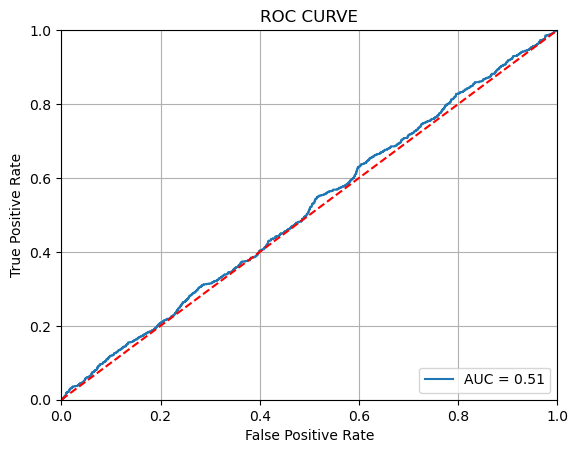

In [21]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.grid()
plt.show()

# RANDOM UNDERSAMPLING

In [22]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=101)
x_resampled, y_resampled = rus.fit_resample(x, y)
len(x_resampled)

7496

In [23]:
pd.crosstab(y_resampled, "sum")

col_0,sum
is_claim,
0,3748
1,3748


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=101)
lr = LogisticRegression()
lr.fit(x_test, y_test)
y_pred = lr.predict(x_test)
print("Logistic Regression Accuracy : {}".format(lr.score(x_test, y_test)*100))

Logistic Regression Accuracy : 52.294557097118464


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[343, 574],
       [320, 637]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))
print("G-mean Score : ", geometric_mean_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.52      0.37      0.43       917
           1       0.53      0.67      0.59       957

    accuracy                           0.52      1874
   macro avg       0.52      0.52      0.51      1874
weighted avg       0.52      0.52      0.51      1874

G-mean Score :  0.5216604845232194


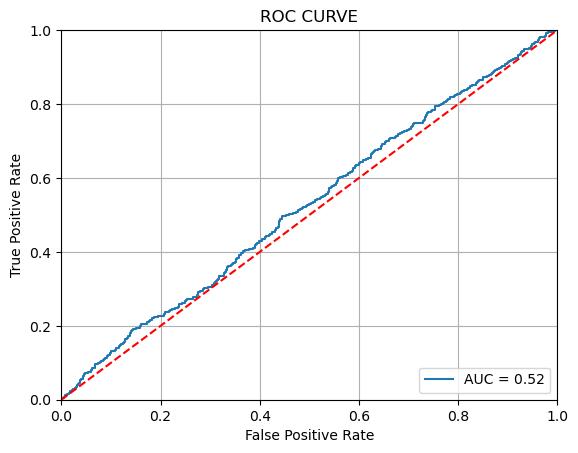

In [27]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.grid()
plt.show()

# TOMEK LINK

In [28]:
from imblearn.under_sampling import TomekLinks
t1 = TomekLinks(sampling_strategy='majority')
x_resampled_t1, y_resampled_t1 = t1.fit_resample(x,y)
len(x_resampled_t1)

56676

In [29]:
pd.crosstab(y_resampled_t1, "sum")

col_0,sum
is_claim,
0,52928
1,3748


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled_t1, y_resampled_t1, test_size=0.25, random_state=101)
lr = LogisticRegression()
lr.fit(x_test, y_test)
y_pred = lr.predict(x_test)
print("Logistic Regression Accuracy : {}".format(lr.score(x_test, y_test)*100))

Logistic Regression Accuracy : 93.337567929988


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13225,     0],
       [  944,     0]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))
print("G-mean Score : ", geometric_mean_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13225
           1       0.00      0.00      0.00       944

    accuracy                           0.93     14169
   macro avg       0.47      0.50      0.48     14169
weighted avg       0.87      0.93      0.90     14169

G-mean Score :  0.0


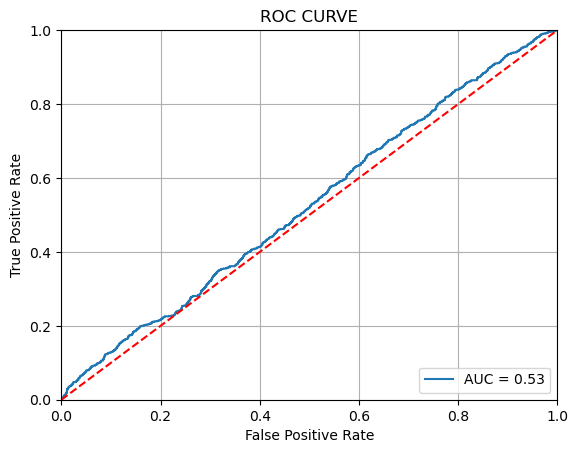

In [33]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [34]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
x_resampled_enn, y_resampled_enn = enn.fit_resample(x, y)
len(x_resampled_enn)

48976

In [35]:
pd.crosstab(y_resampled_enn, "Total")

col_0,Total
is_claim,
0,45228
1,3748


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled_enn, y_resampled_enn, test_size=0.25, random_state=101)
lr = LogisticRegression()
lr.fit(x_test, y_test)
y_pred = lr.predict(x_test)
print("Logistic Regression Accuracy : {}".format(lr.score(x_test, y_test)*100))

Logistic Regression Accuracy : 92.40444299248611


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11314,     0],
       [  930,     0]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred))
print("G-mean Score : ", geometric_mean_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11314
           1       0.00      0.00      0.00       930

    accuracy                           0.92     12244
   macro avg       0.46      0.50      0.48     12244
weighted avg       0.85      0.92      0.89     12244

G-mean Score :  0.0


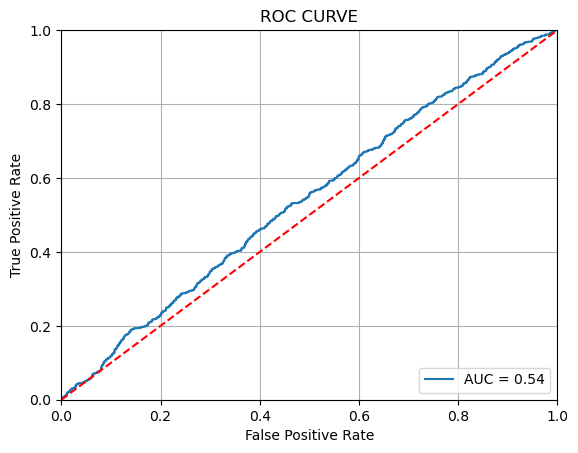

In [39]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc(fpr, tpr))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC CURVE")
plt.legend(loc='lower right')
plt.grid()
plt.show()